In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from collections import Counter
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [4]:
from sklearn.datasets import make_classification

In [12]:
# Create dataset
X,y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

In [14]:
X

array([[ 0.96479937, -0.06644898,  0.98676805, ..., -1.2101605 ,
        -0.62807677,  1.22727382],
       [-0.91651053, -0.56639459, -1.00861409, ..., -0.98453405,
         0.36389642,  0.20947008],
       [-0.10948373, -0.43277388, -0.4576493 , ..., -0.2463834 ,
        -1.05814521, -0.29737608],
       ...,
       [ 1.67463306,  1.75493307,  1.58615382, ...,  0.69272276,
        -1.50384972,  0.22526412],
       [-0.77860873, -0.83568901, -0.19484228, ..., -0.49735437,
         2.47213818,  0.86718741],
       [ 0.24845351, -1.0034389 ,  0.36046013, ...,  0.77323999,
         0.1857344 ,  1.41641179]])

In [16]:
y

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Model
logistic=LogisticRegression()

In [28]:
logistic.fit(X_train,y_train)
y_pred=logistic.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1])

In [30]:
logistic.predict_proba(X_test)

array([[7.78600959e-01, 2.21399041e-01],
       [3.19099883e-02, 9.68090012e-01],
       [6.42146681e-01, 3.57853319e-01],
       [7.47380192e-02, 9.25261981e-01],
       [9.75407948e-01, 2.45920523e-02],
       [3.99148910e-02, 9.60085109e-01],
       [9.78737182e-01, 2.12628178e-02],
       [9.52833227e-01, 4.71667733e-02],
       [7.87837418e-01, 2.12162582e-01],
       [6.81333736e-01, 3.18666264e-01],
       [9.15901071e-01, 8.40989288e-02],
       [2.42589360e-01, 7.57410640e-01],
       [5.03410713e-01, 4.96589287e-01],
       [1.92363097e-01, 8.07636903e-01],
       [7.93085129e-01, 2.06914871e-01],
       [9.43576898e-01, 5.64231015e-02],
       [2.69367304e-02, 9.73063270e-01],
       [3.41710994e-01, 6.58289006e-01],
       [3.08678280e-01, 6.91321720e-01],
       [1.74169127e-01, 8.25830873e-01],
       [4.84677714e-01, 5.15322286e-01],
       [9.62607338e-01, 3.73926615e-02],
       [1.81990356e-01, 8.18009644e-01],
       [7.82536737e-01, 2.17463263e-01],
       [8.635545

In [38]:
score=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print(score)
print(cm)
print(cr)

0.83
[[75 14]
 [20 91]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        89
           1       0.87      0.82      0.84       111

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



# Hyperparameter tuning and Cross Validation

In [93]:
model=LogisticRegression()
penalty=['l1','l2','elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg','lbfgs','liblinear','sag','saga']

In [95]:
params=dict(penalty=penalty,C=c_values,solver=solver)

In [97]:
cv=StratifiedKFold()

In [99]:
# GridSearchCV
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [101]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [103]:
grid.fit(X_train,y_train)

C:\Users\nico_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nico_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nico_\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nico_\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver =

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [104]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

In [107]:
grid.best_score_

0.8787500000000001

In [109]:
y_pred = grid.predict(X_test)

In [111]:
score=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print(score)
print(cm)
print(cr)

0.825
[[78 11]
 [24 87]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.82        89
           1       0.89      0.78      0.83       111

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.83      0.82      0.83       200



# Randomized SearchCV

In [118]:
model=LogisticRegression()
randomcv=RandomizedSearchCV(estimator=model, param_distributions=params, cv=5, scoring='accuracy')

In [120]:
randomcv.fit(X_train,y_train)

C:\Users\nico_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nico_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nico_\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nico_\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver = _

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [130]:
randomcv.best_params_

{'solver': 'saga', 'penalty': 'l2', 'C': 0.01}

In [126]:
randomcv.best_score_

0.8787499999999999

In [132]:
y_pred=randomcv.predict(X_test)

In [134]:
score=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print(score)
print(cm)
print(cr)

0.825
[[78 11]
 [24 87]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.82        89
           1       0.89      0.78      0.83       111

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.83      0.82      0.83       200



# Logistic Regression for multiclass classification problem

In [147]:
# Create dataset
X,y = make_classification(n_samples=1000,n_features=10, n_informative=3,n_classes=3, random_state=42)

In [149]:
y

array([1, 2, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1,
       2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 1,
       2, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2,
       0, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 1, 1, 2, 1, 0, 1, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 2, 1, 2, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 0,
       0, 2, 1, 2, 2, 0, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0,
       0, 1, 1, 2, 1, 2, 2, 0, 0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 1, 1, 0, 2,
       1, 0, 2, 1, 2, 1, 2, 0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2,
       1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 0,
       2, 0, 1, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1,
       0, 2, 0, 0, 1, 0, 2, 0, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2,
       2, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1,

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
logistic=LogisticRegression(multi_class='ovr')
logistic.fit(X_train,y_train)
y_pred=logistic.predict(X_test)

C:\Users\nico_\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [159]:
score=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print(score)
print(cm)
print(cr)

0.65
[[49 12  5]
 [25 27 17]
 [ 2  9 54]]
              precision    recall  f1-score   support

           0       0.64      0.74      0.69        66
           1       0.56      0.39      0.46        69
           2       0.71      0.83      0.77        65

    accuracy                           0.65       200
   macro avg       0.64      0.65      0.64       200
weighted avg       0.64      0.65      0.64       200



# Logistic Regression for imbalenced dataset

In [174]:
# Imbalenced dataset
X, y = make_classification(n_samples=10000, n_features=2, n_clusters_per_class=1, n_redundant=0, weights=[0.99], random_state=42)

In [178]:
Counter(y)

Counter({0: 9859, 1: 141})

<Axes: xlabel='0', ylabel='1'>

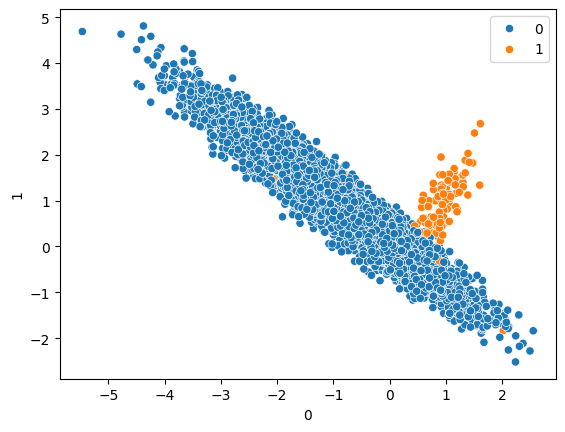

In [182]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1], hue=y)

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [194]:
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [192]:
# Hyperparameter tuning
model=LogisticRegression()
penalty=['l1','l2','elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg','lbfgs','liblinear','sag','saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [196]:
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [198]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [204]:
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [206]:
grid.fit(X_train,y_train)

C:\Users\nico_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3200 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nico_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nico_\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nico_\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solve

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [208]:
grid.best_params_

{'C': 0.1,
 'class_weight': {0: 1, 1: 10},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [210]:
y_pred=grid.predict(X_test)

score=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print(score)
print(cm)
print(cr)

0.9925
[[1963    1]
 [  14   22]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1964
           1       0.96      0.61      0.75        36

    accuracy                           0.99      2000
   macro avg       0.97      0.81      0.87      2000
weighted avg       0.99      0.99      0.99      2000



# Logistic Regression with ROC curve and AUC score

In [217]:
# 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [223]:
# Create a dummy model with default 0 as output 
dummy_model_prob= [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [240]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [242]:
# Prediction based on probability
model_prob=model.predict_proba(X_test)

In [244]:
model_prob

array([[3.51112014e-01, 6.48887986e-01],
       [1.32095334e-01, 8.67904666e-01],
       [5.24593248e-01, 4.75406752e-01],
       [1.47364774e-01, 8.52635226e-01],
       [4.45002438e-02, 9.55499756e-01],
       [9.45724448e-01, 5.42755520e-02],
       [7.82234155e-01, 2.17765845e-01],
       [1.78147680e-01, 8.21852320e-01],
       [2.54573593e-01, 7.45426407e-01],
       [6.10423342e-01, 3.89576658e-01],
       [4.93832440e-02, 9.50616756e-01],
       [4.31275944e-01, 5.68724056e-01],
       [9.95203655e-01, 4.79634477e-03],
       [5.13966827e-01, 4.86033173e-01],
       [2.80691771e-01, 7.19308229e-01],
       [7.96254746e-01, 2.03745254e-01],
       [9.23952966e-01, 7.60470342e-02],
       [5.54754830e-02, 9.44524517e-01],
       [1.13056057e-01, 8.86943943e-01],
       [5.28455143e-01, 4.71544857e-01],
       [7.44101488e-03, 9.92558985e-01],
       [7.86898615e-01, 2.13101385e-01],
       [9.51331807e-01, 4.86681931e-02],
       [9.10512490e-01, 8.94875102e-02],
       [2.454074

In [246]:
# Focus on the positive outcome
model_prob=model_prob[:,1]

In [305]:
dummy_model_auc=roc_auc_score(y_test,dummy_model_prob)
model_auc=roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9216159179981912


In [286]:
# Calculate ROC curves
dummy_fpr, dummy_tpr, _ = roc_curve(y_test,dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test,model_prob)

In [288]:
tresholds

array([       inf, 0.99982728, 0.93918881, 0.93734068, 0.89755377,
       0.89698957, 0.89076141, 0.89029953, 0.86790467, 0.86379686,
       0.75462   , 0.74542641, 0.72032391, 0.71930823, 0.54838445,
       0.50959859, 0.47540675, 0.47415768, 0.47154486, 0.45282654,
       0.44759667, 0.42968574, 0.42350886, 0.37052246, 0.34488493,
       0.29963554, 0.2901814 , 0.2897913 , 0.26458996, 0.21776584,
       0.21477485, 0.20374525, 0.20220372, 0.17080913, 0.16762497,
       0.11042754, 0.10687285, 0.08746126, 0.08597685, 0.05417559,
       0.0539411 , 0.0130019 , 0.00807431, 0.00281658])

In [290]:
model_fpr, model_tpr

(array([0.        , 0.        , 0.        , 0.01075269, 0.01075269,
        0.02150538, 0.02150538, 0.03225806, 0.03225806, 0.04301075,
        0.04301075, 0.05376344, 0.05376344, 0.06451613, 0.06451613,
        0.08602151, 0.08602151, 0.09677419, 0.09677419, 0.11827957,
        0.11827957, 0.13978495, 0.13978495, 0.1827957 , 0.1827957 ,
        0.21505376, 0.21505376, 0.22580645, 0.22580645, 0.30107527,
        0.30107527, 0.33333333, 0.33333333, 0.35483871, 0.35483871,
        0.47311828, 0.47311828, 0.5483871 , 0.5483871 , 0.69892473,
        0.69892473, 0.91397849, 0.91397849, 1.        ]),
 array([0.        , 0.00934579, 0.42990654, 0.42990654, 0.4953271 ,
        0.4953271 , 0.51401869, 0.51401869, 0.56074766, 0.56074766,
        0.64485981, 0.64485981, 0.6728972 , 0.6728972 , 0.79439252,
        0.79439252, 0.8411215 , 0.8411215 , 0.85046729, 0.85046729,
        0.86915888, 0.86915888, 0.87850467, 0.87850467, 0.89719626,
        0.89719626, 0.90654206, 0.90654206, 0.91588785, 0.

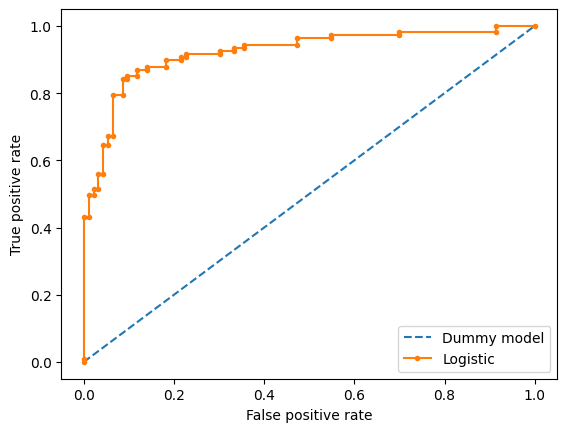

In [292]:
# Plot the ROC curve
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy model')
pyplot.plot(model_fpr, model_tpr, marker='.', label='Logistic')

pyplot.xlabel('False positive rate')
pyplot.ylabel('True positive rate')

pyplot.legend()
pyplot.show()

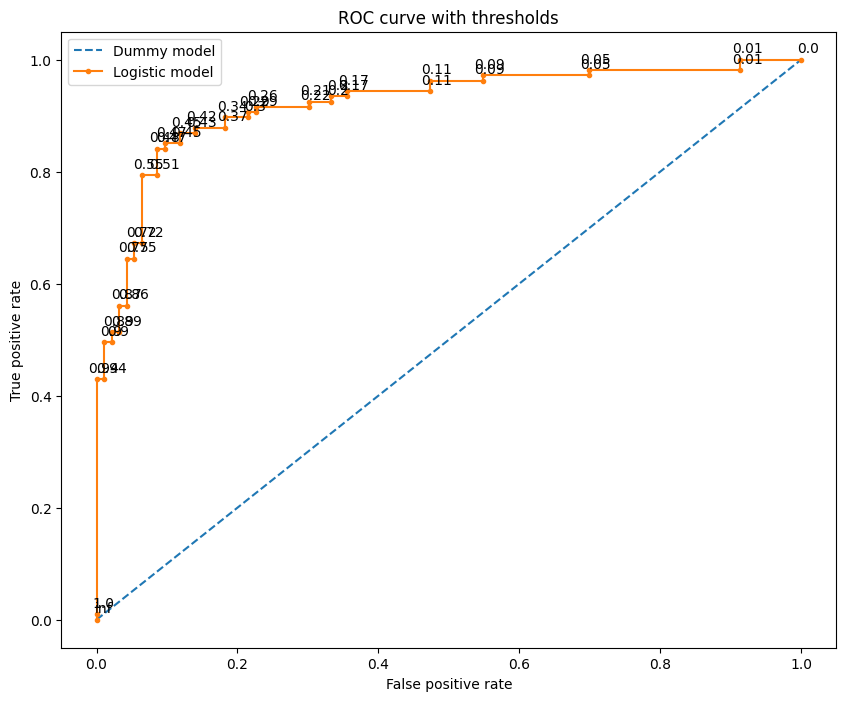

In [303]:
# Define the good threshold

fig, ax = plt.subplots(figsize=(10, 8))

# Roc curve
ax.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy model')
ax.plot(model_fpr, model_tpr, marker='.', label='Logistic model')

# Annotate each point with the threshold
for fpr, tpr, threshold in zip(model_fpr, model_tpr, thresholds):
    ax.annotate(f'{np.round(threshold, 2)}', xy=(fpr, tpr), textcoords="offset points", xytext=(5,5), ha='center')

ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')
ax.legend()
plt.title("ROC curve with thresholds")
plt.show()
